In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [4]:
# Nossos dados foram obtidos através do portal UCI: Machine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set 
# Contêm 54 perguntas (features) para avaliar casamento.

# Foram respondidas por dois groupos:
#   1) Divorciados (coluna "Class" igual a 1)
#   2) Casados (coluna "Class" igual a 0)

# A ideia é buscar as seguintes informações:
#    1) Quais as perguntas chaves para determinar se um relacionamento está fadado ao fracasso
#    2) Prever, com estatisticas simples, se um casal é divorciado ou não
#    3) Responder o que representa as respostas 0,1,2,3 e 4.


# Como são os dados?
df = pd.read_csv('/home/anderson/Área de Trabalho/Repositorios_GIT/Estatistica_descritiva_Trabalho_Grupo_1/data-eng/divorce.csv',sep=';')
df.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [5]:
def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl])

  return separated

separated = separate_by_class(df)

teste_df = pd.DataFrame(separated)

teste_df.head()

,0
0,Atr1 Atr2 Atr3 Atr4 Atr5 Atr6 Atr7 ...
1,Atr1 Atr2 Atr3 Atr4 Atr5 Atr6 Atr7 ...


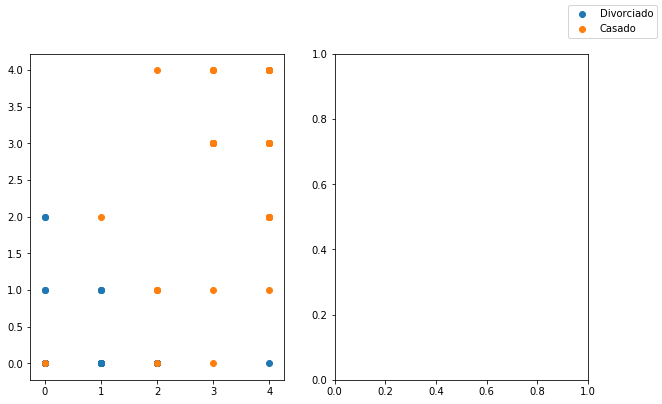

In [6]:
#Não há possibilidade de fazer com esse método

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
 # s.plt.scatter(s['atr1'], s['atr2'])
    ax[0].scatter(s['Atr39'], s['Atr5'])
   # ax[1].scatter()
    
fig.legend(['Divorciado', 'Casado'])


In [7]:
#Calcular a média e...


def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in dataset.columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(df)

summaries_teste = pd.DataFrame(summarize_dataset(df))

summaries_teste


#se = summaries_teste.groupby(0).count()

#se


,0,1,2
0,1.776471,1.622463,170
1,1.652941,1.464328,170
2,1.764706,1.411274,170
3,1.482353,1.499896,170
4,1.541176,1.627361,170
5,0.747059,0.901383,170
6,0.494118,0.896051,170
7,1.452941,1.541816,170
8,1.458824,1.553387,170
9,1.576471,1.417342,170


In [8]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['Class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

summaries_by_class = summarize_by_class(df)
print(summaries_by_class)

{0: [(0.3953488372093023, 0.8928536660675563, 86), (0.46511627906976744, 0.757868406362806, 86), (0.6395348837209303, 0.9138824754943513, 86), (0.26744186046511625, 0.7986095271485019, 86), (0.10465116279069768, 0.374447492746619, 86), (0.37209302325581395, 0.7320965692417294, 86), (0.011627906976744186, 0.10720400531735917, 86), (0.12790697674418605, 0.39756560458787815, 86), (0.05813953488372093, 0.2340071139243965, 86), (0.4069767441860465, 0.6713039545981889, 86), (0.19767441860465115, 0.39824520440799305, 86), (0.3953488372093023, 0.5762563578308774, 86), (0.6046511627906976, 0.7198040716531239, 86), (0.29069767441860467, 0.5026968911910993, 86), (0.23255813953488372, 0.4743273966132823, 86), (0.16279069767441862, 0.3994317217980854, 86), (0.1744186046511628, 0.4089652417457902, 86), (0.09302325581395349, 0.29046502318132095, 86), (0.13953488372093023, 0.37857722316510967, 86), (0.06976744186046512, 0.25475467790937967, 86), (0.1511627906976744, 0.3582074837383571, 86), (0.0697674

In [9]:
def calculate_probability(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent



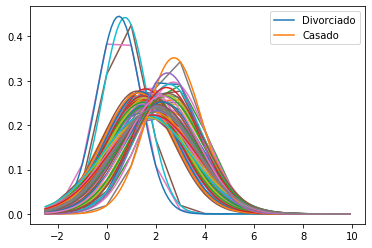

In [10]:
x = np.arange(-2,6,1)
for summ in summaries:
  y = calculate_probability(x, summ[0], summ[1])
  plt.plot(x,y)

plt.legend(['Divorciado', 'Casado'])
x = np.arange(-2.5,10,0.1)
for summ in summaries:
  y = calculate_probability(x, summ[0], summ[1])
  plt.plot(x,y)

plt.legend(['Divorciado', 'Casado'])